In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

from matplotlib.gridspec import GridSpec

from scipy.stats import norm
from scipy import stats
import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [2]:
#Importing Loan Dataset
tele = pd.read_csv("telecom_churn_data.csv", sep=",", encoding = "ISO-8859-1")
tele.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
#Creating backup of data
original_tele = tele.copy()

In [4]:
#Checking dimension of the data
tele.shape

(99999, 226)

In [5]:
#Check if the phone numbers are unique
mob_unique = tele['mobile_number'].nunique()
print (mob_unique)

99999


** So all the numbers are unique and can be treated as unique ids

In [6]:
#Checking which columns consists of null values
tele.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [7]:
#Feature type summary
tele.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

** There are 99999 rows and 226 columns in the data. Majority columns are numeric type, but we need to also inspect which are the categorical columns.

In [8]:
#Exploring the data statistics
tele.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [9]:
#We need to identify what type of columns we have across the data set
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in tele.columns if column not in id_cols + date_cols + cat_cols]

#Print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == tele.shape[1])

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8
True


### Data cleaning and treating missing data

In [10]:
#Check for missing data
tele.isnull().sum()*100/tele.shape[0]

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

### Imputing Missing Values

### a) Imputing using zero

In [11]:
#Some recharge columns have minimum value of 1 while some don't
rech_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']

tele[rech_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [12]:
#It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
tele.loc[tele.total_rech_data_6.isnull() & tele.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


** In the recharge variables where minumum value is 1, we can impute missing values with 0 since it means customer didn't recharge their phone number that month.

In [13]:
#Creating a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [14]:
#Imputing missing values with 0
tele[zero_impute] = tele[zero_impute].apply(lambda x: x.fillna(0))

In [15]:
#Checking the imputation
print("Missing value ratio:\n")
print(tele[zero_impute].isnull().sum()*100/tele.shape[1])

# summary
print("\n\nSummary statistics\n")
print(tele[zero_impute].describe(include='all'))

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  av_rech_

In [16]:
#Drop some unnecessary columns like id and date columns
print("Shape before dropping: ", tele.shape)
tele = tele.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", tele.shape)

Shape before dropping:  (99999, 226)
Shape after dropping:  (99999, 212)


### b) Replace NaN values in categorical variables

** To prevent data loss, we will replace missing values in the categorical values with "-1" where we will consider "-1" will be a new category 

In [17]:
#Replacing missing values with '-1' in categorical columns
tele[cat_cols] = tele[cat_cols].apply(lambda x: x.fillna(-1))

In [18]:
#Checking missing value ratio
print("Missing value ratio:\n")
print(tele[cat_cols].isnull().sum()*100/tele.shape[0])

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


### c) Drop the columns / variables with many missing values, by considering a threshold

In [19]:
initial_cols = tele.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(tele.apply(lambda column: True if column.isnull().sum()/tele.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':tele.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,arpu_9,True
7,onnet_mou_6,True
8,onnet_mou_7,True
9,onnet_mou_8,True


In [20]:
#Dropping columns
tele = tele.loc[:, include_cols]

dropped_cols = tele.shape[1] - initial_cols
print("{0} columns dropped.".format(dropped_cols))

-16 columns dropped.


### d) Check for missing values and do the necessary imputation

In [21]:
#Check for other missing values
tele.isnull().sum()*100/tele.shape[0]

loc_og_t2o_mou        1.018010
std_og_t2o_mou        1.018010
loc_ic_t2o_mou        1.018010
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
arpu_9                0.000000
onnet_mou_6           3.937039
onnet_mou_7           3.859039
onnet_mou_8           5.378054
onnet_mou_9           7.745077
offnet_mou_6          3.937039
offnet_mou_7          3.859039
offnet_mou_8          5.378054
offnet_mou_9          7.745077
roam_ic_mou_6         3.937039
roam_ic_mou_7         3.859039
roam_ic_mou_8         5.378054
roam_ic_mou_9         7.745077
roam_og_mou_6         3.937039
roam_og_mou_7         3.859039
roam_og_mou_8         5.378054
roam_og_mou_9         7.745077
loc_og_t2t_mou_6      3.937039
loc_og_t2t_mou_7      3.859039
loc_og_t2t_mou_8      5.378054
loc_og_t2t_mou_9      7.745077
loc_og_t2m_mou_6      3.937039
loc_og_t2m_mou_7      3.859039
loc_og_t2m_mou_8      5.378054
loc_og_t2m_mou_9      7.745077
loc_og_t2f_mou_6      3.937039
loc_og_t

In [22]:
#Imputing additional missing values with 0
zero_impute_a = ['loc_og_t2o_mou','std_og_t2o_mou', 'loc_ic_t2o_mou','onnet_mou_6','onnet_mou_7','onnet_mou_8','onnet_mou_9','offnet_mou_6',
        'offnet_mou_7','offnet_mou_8','offnet_mou_9','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_ic_mou_9',
        'roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','roam_og_mou_9','loc_og_t2t_mou_6','loc_og_t2t_mou_6',
        'loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9','loc_og_t2m_mou_6','loc_og_t2m_mou_7',
        'loc_og_t2m_mou_8','loc_og_t2m_mou_9','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8',
        'loc_og_t2f_mou_9','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8','loc_og_t2c_mou_9','loc_og_mou_6',
        'loc_og_mou_7','loc_og_mou_8','loc_og_mou_9','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9',
        'std_og_t2m_mou_6', 'std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9','std_og_t2f_mou_6',
        'std_og_t2f_mou_7','std_og_t2f_mou_8','std_og_t2f_mou_9','std_og_t2c_mou_6','std_og_t2c_mou_7',
        'std_og_t2c_mou_8','std_og_t2c_mou_9','std_og_mou_6','std_og_mou_7','std_og_mou_8','std_og_mou_9','isd_og_mou_6',
        'isd_og_mou_7','isd_og_mou_8','isd_og_mou_9','spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','spl_og_mou_9',
        'og_others_6','og_others_7','og_others_8','og_others_9','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8',
        'loc_ic_t2t_mou_9','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9','loc_ic_t2f_mou_6',
        'loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','loc_ic_mou_9',
        'std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8','std_ic_t2t_mou_9','std_ic_t2m_mou_6','std_ic_t2m_mou_7',
        'std_ic_t2m_mou_8','std_ic_t2m_mou_9','std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','std_ic_t2f_mou_9','std_ic_t2o_mou_6',
        'std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','std_ic_mou_9',
        'spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','spl_ic_mou_9','isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','isd_ic_mou_9',
        'ic_others_6','ic_others_7','ic_others_8','ic_others_9'
       ]

tele[zero_impute_a] = tele[zero_impute_a].apply(lambda x: x.fillna(0))

In [23]:
#Final check for missing values
tele.isnull().sum()*100/tele.shape[0]

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

In [24]:
tele.shape

(99999, 196)

## Filtering High Value Customer (HVC)

**Calculation of total data recharge amount for Month 6 and 7. We will take the average recharge done of the two months and find the 70th percentile of the recharge amount to determine the HVC

In [25]:
#Calculate the total data recharge amount for 6 and 7 => number of recharges * average recharge amount
tele['total_data_rech_6'] = tele.total_rech_data_6 * tele.av_rech_amt_data_6
tele['total_data_rech_7'] = tele.total_rech_data_7 * tele.av_rech_amt_data_7

In [26]:
#Calculate total recharge amount for 6 and 7 --> call recharge amount + data recharge amount
tele['amt_data_6'] = tele.total_rech_amt_6 + tele.total_data_rech_6
tele['amt_data_7'] = tele.total_rech_amt_7 + tele.total_data_rech_7

In [27]:
#Calculate average recharge done by customer in 6 and 7
tele['av_amt_data_6_7'] = (tele.amt_data_6 + tele.amt_data_7)/2

In [28]:
#Look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(tele.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [29]:
#Retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
tele_filtered = tele.loc[tele.av_amt_data_6_7 >= tele.av_amt_data_6_7.quantile(0.7), :]
tele_filtered = tele_filtered.reset_index(drop=True)
tele_filtered.shape

(30001, 201)

In [30]:
#Delete variables created to filter high-value customers
tele_filtered = tele_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
tele_filtered.shape

(30001, 196)

##### We have 30,001 rows after selecting the customers who have recharge value of more than or equal to the 70th percentile of all other customers. These are our high valued customers and we will go ahead with our analysis with this dataset of HVCs.

#### Deriving some additional variables. We have the data for month 8. Now in this situation, an important feature would be  the difference between the 8th month and the previous months. This because the difference can be in patterns such as usage difference or recharge value difference.

In [31]:
#Deriving some variables from the difference between month 8 and the average of Month 6 and 7
tele_filtered['arpu_diff'] = tele_filtered.arpu_8 - ((tele_filtered.arpu_6 + tele_filtered.arpu_7)/2)
tele_filtered['onnet_mou_diff'] = tele_filtered.onnet_mou_8 - ((tele_filtered.onnet_mou_6 + tele_filtered.onnet_mou_7)/2)
tele_filtered['offnet_mou_diff'] = tele_filtered.offnet_mou_8 - ((tele_filtered.offnet_mou_6 + tele_filtered.offnet_mou_7)/2)
tele_filtered['roam_ic_mou_diff'] = tele_filtered.roam_ic_mou_8 - ((tele_filtered.roam_ic_mou_6 + tele_filtered.roam_ic_mou_7)/2)
tele_filtered['roam_og_mou_diff'] = tele_filtered.roam_og_mou_8 - ((tele_filtered.roam_og_mou_6 + tele_filtered.roam_og_mou_7)/2)
tele_filtered['loc_og_mou_diff'] = tele_filtered.loc_og_mou_8 - ((tele_filtered.loc_og_mou_6 + tele_filtered.loc_og_mou_7)/2)
tele_filtered['std_og_mou_diff'] = tele_filtered.std_og_mou_8 - ((tele_filtered.std_og_mou_6 + tele_filtered.std_og_mou_7)/2)
tele_filtered['isd_og_mou_diff'] = tele_filtered.isd_og_mou_8 - ((tele_filtered.isd_og_mou_6 + tele_filtered.isd_og_mou_7)/2)
tele_filtered['spl_og_mou_diff'] = tele_filtered.spl_og_mou_8 - ((tele_filtered.spl_og_mou_6 + tele_filtered.spl_og_mou_7)/2)
tele_filtered['total_og_mou_diff'] = tele_filtered.total_og_mou_8 - ((tele_filtered.total_og_mou_6 + tele_filtered.total_og_mou_7)/2)
tele_filtered['loc_ic_mou_diff'] = tele_filtered.loc_ic_mou_8 - ((tele_filtered.loc_ic_mou_6 + tele_filtered.loc_ic_mou_7)/2)
tele_filtered['std_ic_mou_diff'] = tele_filtered.std_ic_mou_8 - ((tele_filtered.std_ic_mou_6 + tele_filtered.std_ic_mou_7)/2)
tele_filtered['isd_ic_mou_diff'] = tele_filtered.isd_ic_mou_8 - ((tele_filtered.isd_ic_mou_6 + tele_filtered.isd_ic_mou_7)/2)
tele_filtered['spl_ic_mou_diff'] = tele_filtered.spl_ic_mou_8 - ((tele_filtered.spl_ic_mou_6 + tele_filtered.spl_ic_mou_7)/2)
tele_filtered['total_ic_mou_diff'] = tele_filtered.total_ic_mou_8 - ((tele_filtered.total_ic_mou_6 + tele_filtered.total_ic_mou_7)/2)
tele_filtered['total_rech_num_diff'] = tele_filtered.total_rech_num_8 - ((tele_filtered.total_rech_num_6 + tele_filtered.total_rech_num_7)/2)
tele_filtered['total_rech_amt_diff'] = tele_filtered.total_rech_amt_8 - ((tele_filtered.total_rech_amt_6 + tele_filtered.total_rech_amt_7)/2)
tele_filtered['max_rech_amt_diff'] = tele_filtered.max_rech_amt_8 - ((tele_filtered.max_rech_amt_6 + tele_filtered.max_rech_amt_7)/2)
tele_filtered['total_rech_data_diff'] = tele_filtered.total_rech_data_8 - ((tele_filtered.total_rech_data_6 + tele_filtered.total_rech_data_7)/2)
tele_filtered['max_rech_data_diff'] = tele_filtered.max_rech_data_8 - ((tele_filtered.max_rech_data_6 + tele_filtered.max_rech_data_7)/2)
tele_filtered['av_rech_amt_data_diff'] = tele_filtered.av_rech_amt_data_8 - ((tele_filtered.av_rech_amt_data_6 + tele_filtered.av_rech_amt_data_7)/2)
tele_filtered['vol_2g_mb_diff'] = tele_filtered.vol_2g_mb_8 - ((tele_filtered.vol_2g_mb_6 + tele_filtered.vol_2g_mb_7)/2)
tele_filtered['vol_3g_mb_diff'] = tele_filtered.vol_3g_mb_8 - ((tele_filtered.vol_3g_mb_6 + tele_filtered.vol_3g_mb_7)/2)

### Creating the target variable "churn_flag" using some variables tagged to month 9 and then removing the columns tagged to month 9. We will us the High value customer filtered dataset.

In [32]:
#Creating target variable and checking the count and distribution of churns and non churns
tele_filtered['churn_flag'] = np.where(
                            ((tele_filtered['total_ic_mou_9'] == 0.00) | (tele_filtered['total_og_mou_9'] == 0.00))
                            & ((tele_filtered['vol_2g_mb_9'] == 0.00) | (tele_filtered['vol_3g_mb_9'] == 0.00)), 1, 0)
print(tele_filtered['churn_flag'].value_counts())
print(tele_filtered['churn_flag'].value_counts()/tele_filtered.shape[0])

0    26735
1     3266
Name: churn_flag, dtype: int64
0    0.891137
1    0.108863
Name: churn_flag, dtype: float64


**We observe that ~10% of customers are probable of churn among the HVCs 

In [33]:
#Removing all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names) and checking
tele_filtered = tele_filtered.drop(tele_filtered.filter(regex='_9|sep', axis = 1).columns, axis=1)
tele_filtered.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 172 columns):
loc_og_t2o_mou           30001 non-null float64
std_og_t2o_mou           30001 non-null float64
loc_ic_t2o_mou           30001 non-null float64
arpu_6                   30001 non-null float64
arpu_7                   30001 non-null float64
arpu_8                   30001 non-null float64
onnet_mou_6              30001 non-null float64
onnet_mou_7              30001 non-null float64
onnet_mou_8              30001 non-null float64
offnet_mou_6             30001 non-null float64
offnet_mou_7             30001 non-null float64
offnet_mou_8             30001 non-null float64
roam_ic_mou_6            30001 non-null float64
roam_ic_mou_7            30001 non-null float64
roam_ic_mou_8            30001 non-null float64
roam_og_mou_6            30001 non-null float64
roam_og_mou_7            30001 non-null float64
roam_og_mou_8            30001 non-null float64
loc_og_t2t_mou_6         3

In [34]:
tele_filtered = tele_filtered.astype(int)
tele_filtered.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 172 columns):
loc_og_t2o_mou           30001 non-null int64
std_og_t2o_mou           30001 non-null int64
loc_ic_t2o_mou           30001 non-null int64
arpu_6                   30001 non-null int64
arpu_7                   30001 non-null int64
arpu_8                   30001 non-null int64
onnet_mou_6              30001 non-null int64
onnet_mou_7              30001 non-null int64
onnet_mou_8              30001 non-null int64
offnet_mou_6             30001 non-null int64
offnet_mou_7             30001 non-null int64
offnet_mou_8             30001 non-null int64
roam_ic_mou_6            30001 non-null int64
roam_ic_mou_7            30001 non-null int64
roam_ic_mou_8            30001 non-null int64
roam_og_mou_6            30001 non-null int64
roam_og_mou_7            30001 non-null int64
roam_og_mou_8            30001 non-null int64
loc_og_t2t_mou_6         30001 non-null int64
loc_og_t2t_mou_7

In [35]:
tele_filtered.shape

(30001, 172)

### Exploratory Data Analysis (EDA)

<Figure size 576x288 with 0 Axes>

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Churn status')

Text(0.5, 1.0, 'Churn Distribution')

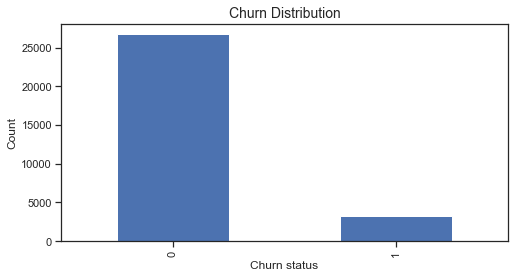

In [36]:
#Churn distribution
plt.figure(figsize=(8,4))
tele_filtered['churn_flag'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Churn status')
plt.title('Churn Distribution',fontsize=14)

In [37]:
df = tele_filtered

## arpu (Average Revenue per user)

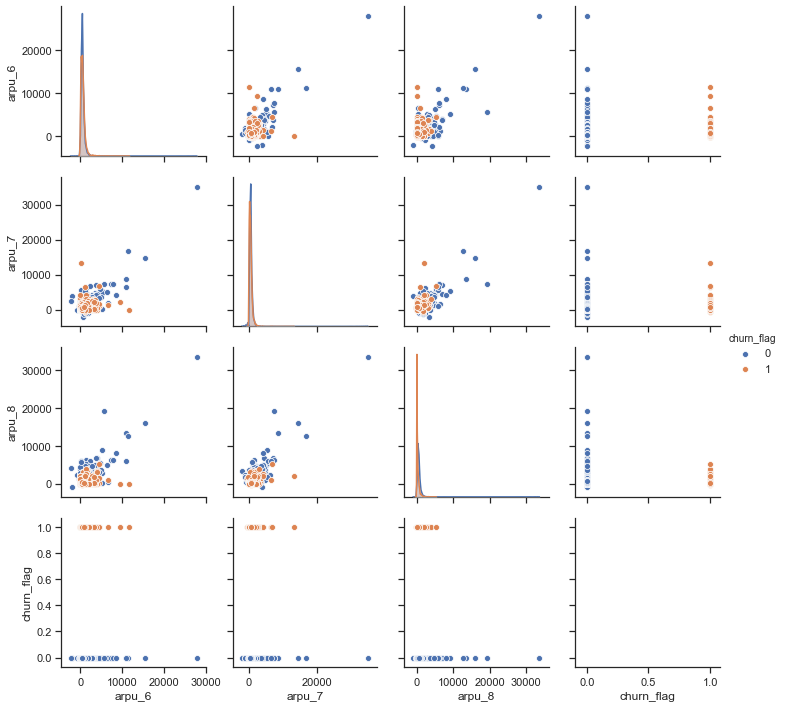

In [38]:
#Checking based on arpu (Average Revenue per user)
sns.pairplot(data=tele_filtered[['arpu_6','arpu_7','arpu_8','churn_flag']],hue='churn_flag')

Text(0.5, 1.0, 'Churn')

Text(0.5, 1.0, 'Non-Churn')

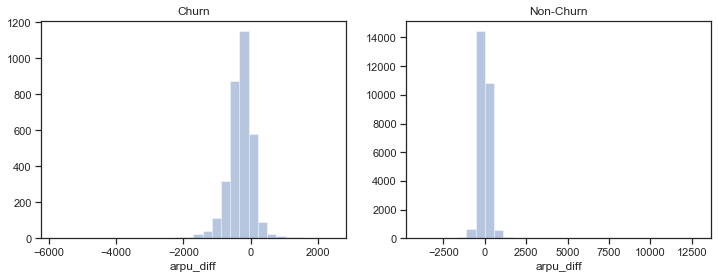

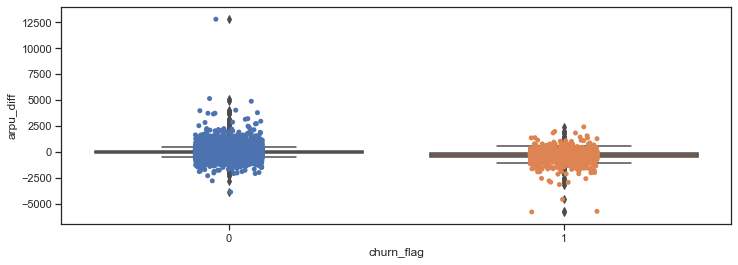

In [39]:
#Performing further on arpu_diff
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].arpu_diff, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].arpu_diff, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='arpu_diff', data=df)
sns.stripplot(x='churn_flag', y='arpu_diff', data=df, jitter=True, edgecolor="gray")

- It is pretty clear that based on the average revenue per user, number of churns is reducing as we go higher and the customer is sattisfied with the services.
- The average revenue in action month 8 has reduced quite a lot in comparison to the average of good phase 6 and 7, with major churns observed.

## onnet_mou ( Calls on network/ within the same network usage)

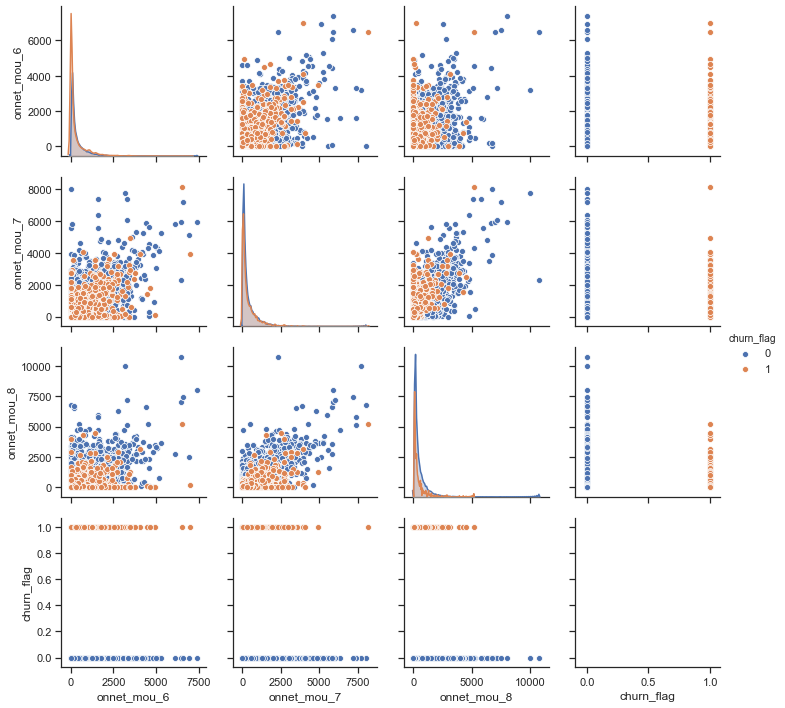

In [40]:
#Checking based on onnet_mou (Calls on network/ within the same network usage)
sns.pairplot(data=tele_filtered[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churn_flag']],hue='churn_flag')

Text(0.5, 1.0, 'Churn')

Text(0.5, 1.0, 'Non-Churn')

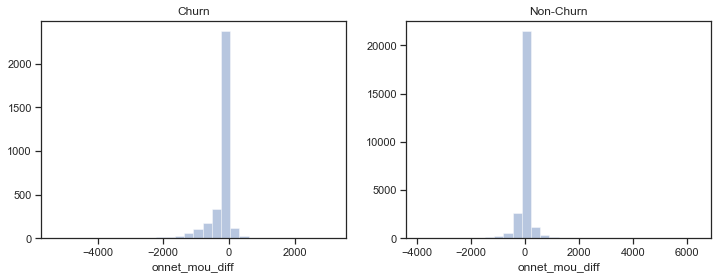

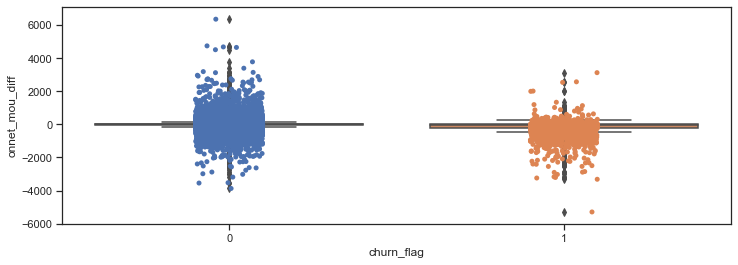

In [41]:
#Performing further on onnet_mou_diff
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].onnet_mou_diff, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].onnet_mou_diff, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='onnet_mou_diff', data=df)
sns.stripplot(x='churn_flag', y='onnet_mou_diff', data=df, jitter=True, edgecolor="gray")

We observe with respect to calls within network over the months the number of churns have reduced.

## offnet_mou (Calls outside of the operator network)

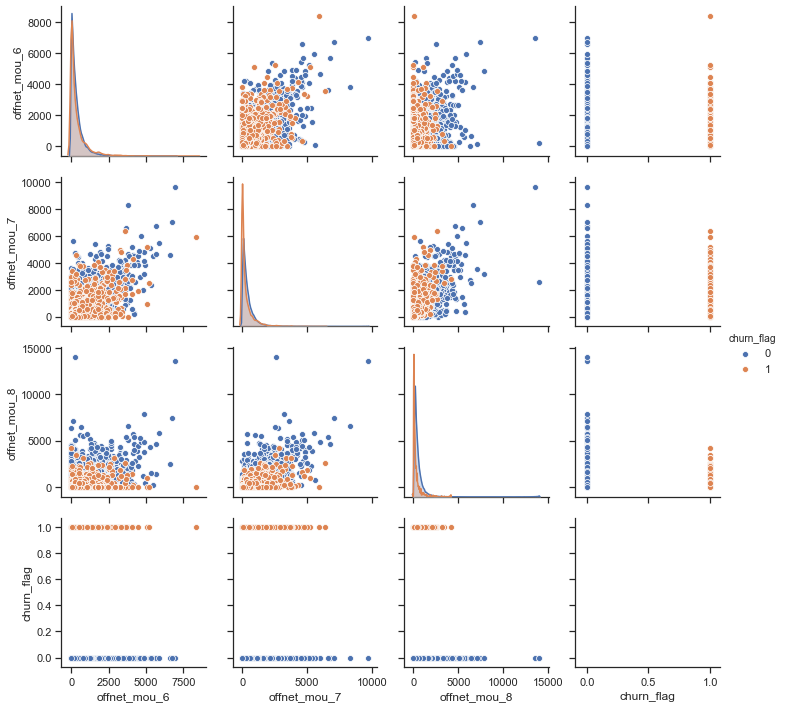

In [42]:
#Checking based on offnet_mou (Calls outside of the operator network)
sns.pairplot(data=tele_filtered[['offnet_mou_6','offnet_mou_7','offnet_mou_8','churn_flag']],hue='churn_flag')

Text(0.5, 1.0, 'Churn')

Text(0.5, 1.0, 'Non-Churn')

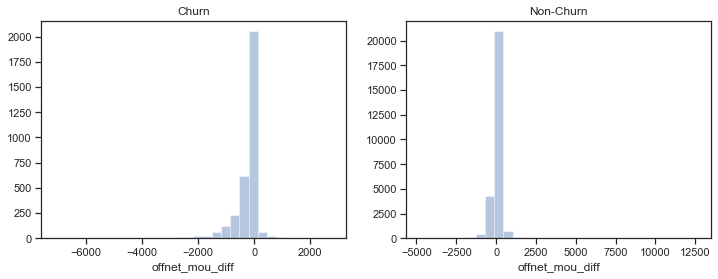

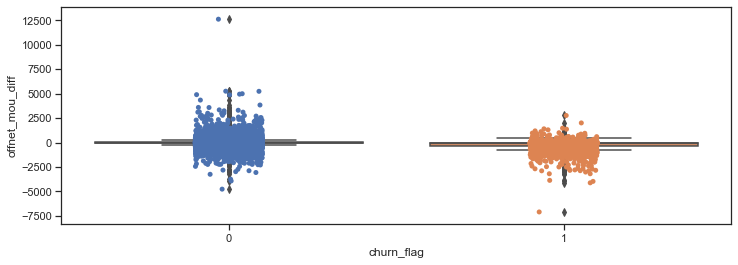

In [43]:
#Performing further on offnet_mou_diff
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].offnet_mou_diff, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].offnet_mou_diff, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='offnet_mou_diff', data=df)
sns.stripplot(x='churn_flag', y='offnet_mou_diff', data=df, jitter=True, edgecolor="gray")

For calls to outside networks, the number of churns have increased as the months progressed. This indicates, shortage of good talktimes offer for calling other networks.

## roam_og_mou (Outgoing roaming calls)

Text(0.5, 1.0, 'Churn')

Text(0.5, 1.0, 'Non-Churn')

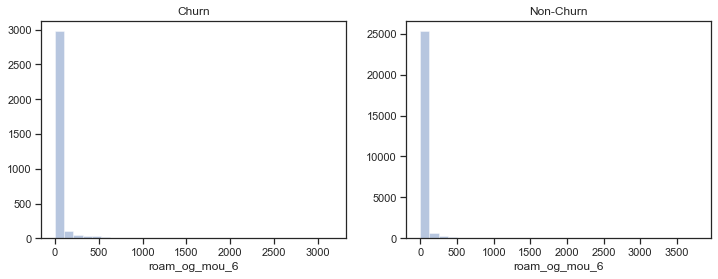

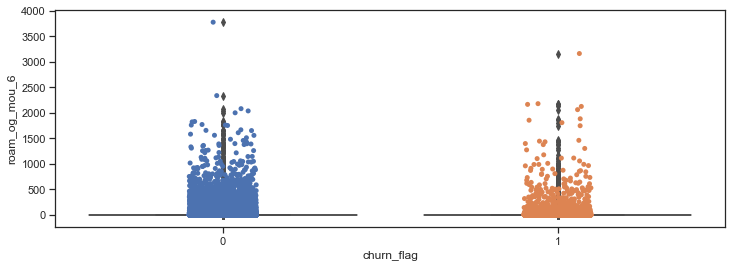

In [44]:
#Performing further EDA on roam_og_mou (Outgoing roaming calls) for good month 6
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].roam_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].roam_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='roam_og_mou_6', data=df)
sns.stripplot(x='churn_flag', y='roam_og_mou_6', data=df, jitter=True, edgecolor="gray")

Text(0.5, 1.0, 'Churn')

Text(0.5, 1.0, 'Non-Churn')

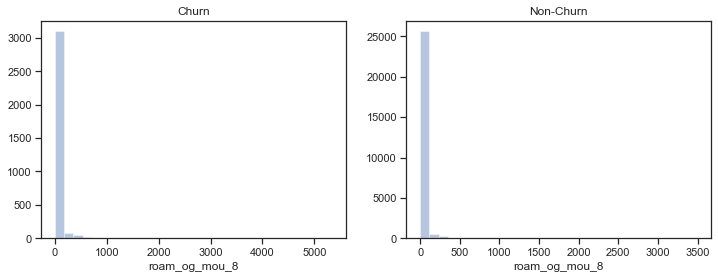

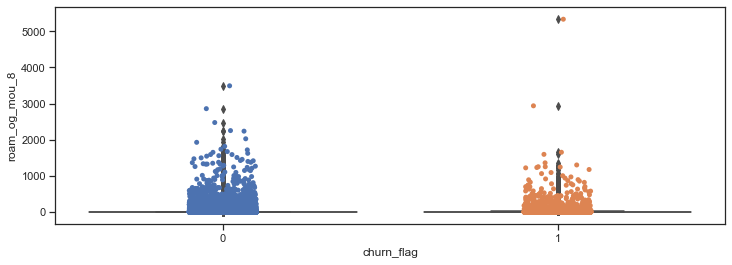

In [45]:
#Performing further EDA on roam_og_mou (Outgoing roaming calls) for action month 8
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].roam_og_mou_8, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].roam_og_mou_8, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='roam_og_mou_8', data=df)
sns.stripplot(x='churn_flag', y='roam_og_mou_8', data=df, jitter=True, edgecolor="gray")

We observe that for the good month 6, the density of churn for roaming outgoing calls is very high, which showcases the fact that the outgoing call rates must be high.

## isd_og_mou (ISD outgoing call)

Text(0.5, 1.0, 'Churn')

Text(0.5, 1.0, 'Non-Churn')

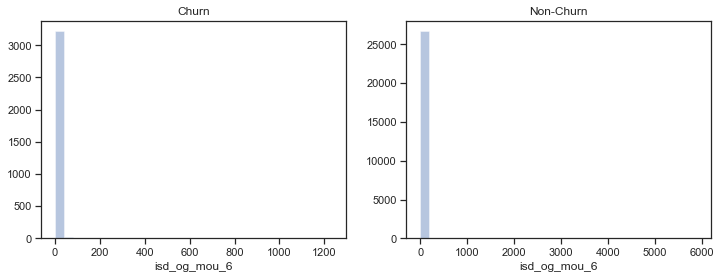

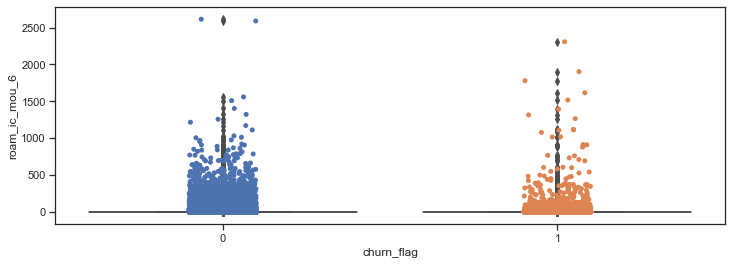

In [46]:
#Performing further EDA on isd_og_mou (ISD outgoing call) for good month 6
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].isd_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].isd_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='roam_ic_mou_6', data=df)
sns.stripplot(x='churn_flag', y='roam_ic_mou_6', data=df, jitter=True, edgecolor="gray")

Text(0.5, 1.0, 'Churn')

Text(0.5, 1.0, 'Non-Churn')

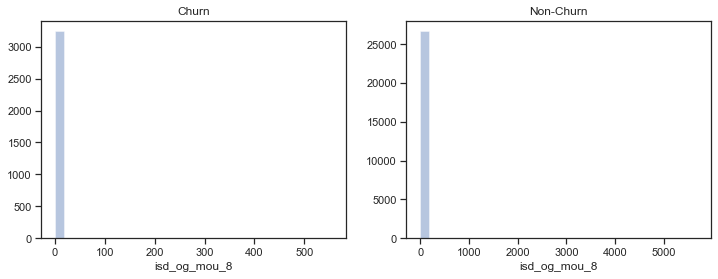

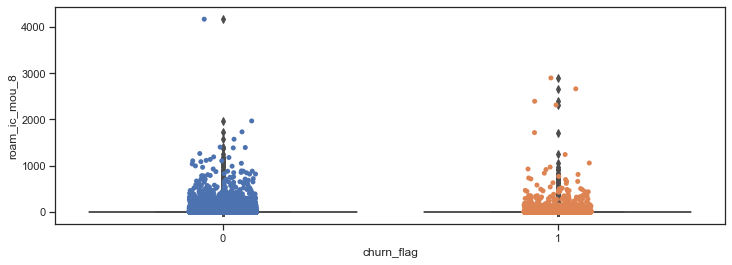

In [47]:
#Performing further EDA on isd_og_mou (ISD outgoing call) for action month 8
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].isd_og_mou_8, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].isd_og_mou_8, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='roam_ic_mou_8', data=df)
sns.stripplot(x='churn_flag', y='roam_ic_mou_8', data=df, jitter=True, edgecolor="gray")

For ISD outgoing calls, we observe that the number of non churns have reduced a lot.

## std_og_mou (STD outgoing call)

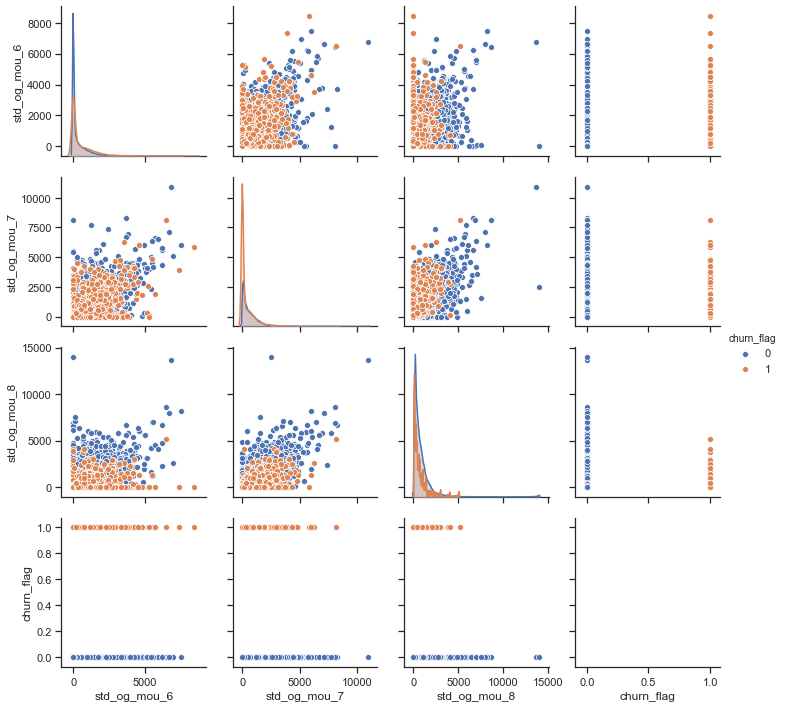

In [48]:
#Checking based on std_og_mou (STD outgoing call)
sns.pairplot(data=tele_filtered[['std_og_mou_6','std_og_mou_7','std_og_mou_8','churn_flag']],hue='churn_flag')

Text(0.5, 1.0, 'Churn')

Text(0.5, 1.0, 'Non-Churn')

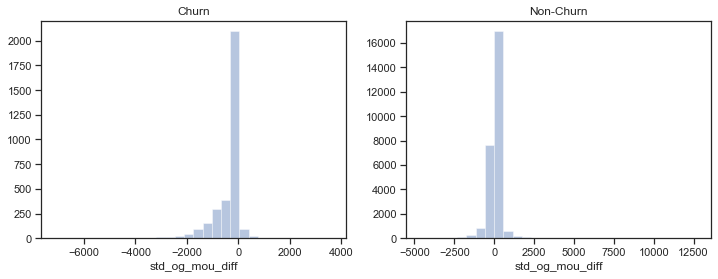

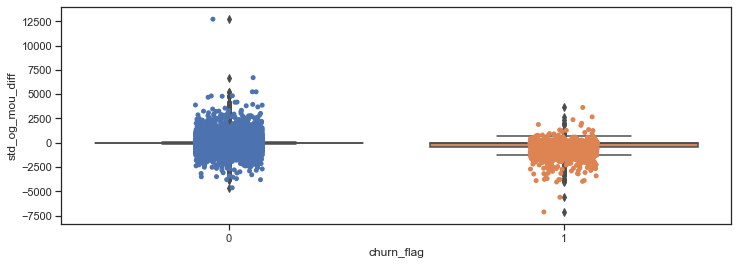

In [49]:
#Performing further on std_og_mou_diff
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].std_og_mou_diff, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].std_og_mou_diff, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='std_og_mou_diff', data=df)
sns.stripplot(x='churn_flag', y='std_og_mou_diff', data=df, jitter=True, edgecolor="gray")

For STD outgoing calls we observe that there was a tremendous increase in churns for the good month of 7.

## total_og_mou (Total outgoing calls by the customer)

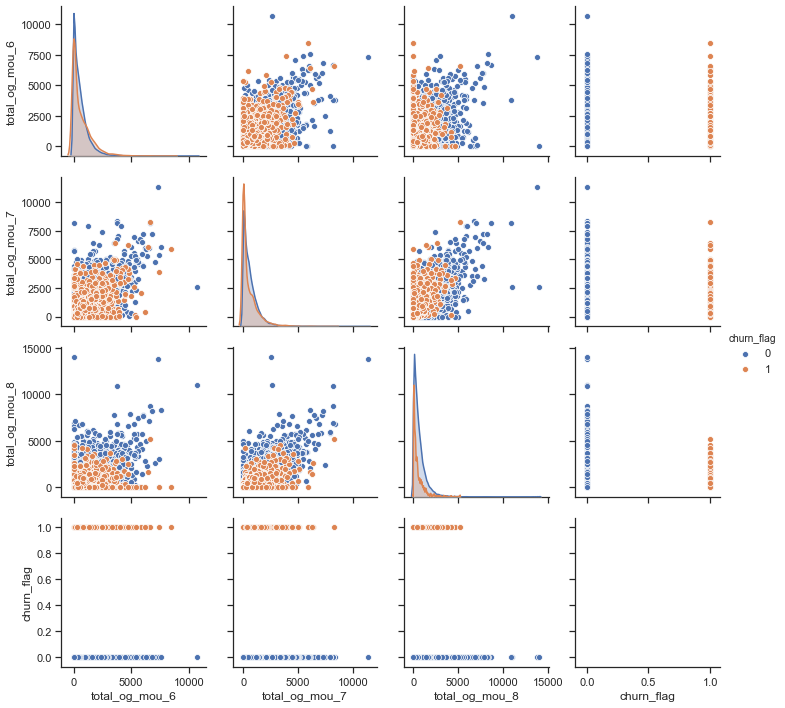

In [50]:
#Checking based on total_og_mou (Total outgoing calls by the customer)
sns.pairplot(data=tele_filtered[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churn_flag']],hue='churn_flag')

Text(0.5, 1.0, 'Churn')

Text(0.5, 1.0, 'Non-Churn')

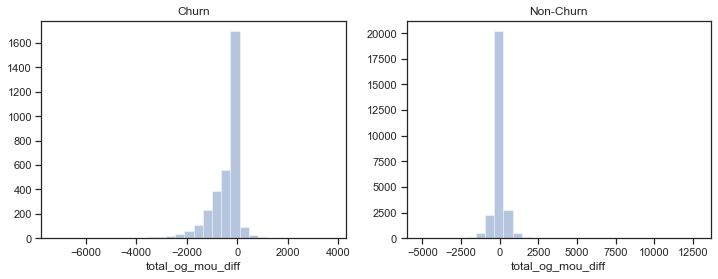

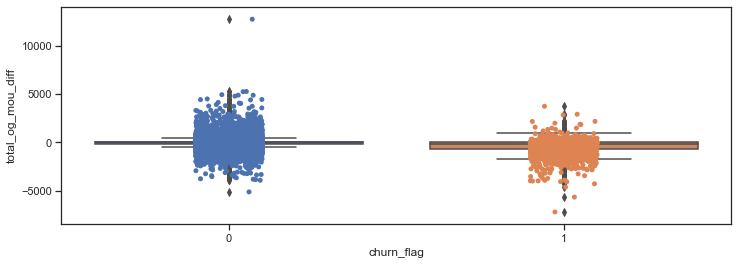

In [51]:
#Performing further on total_og_mou_diff
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].total_og_mou_diff, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].total_og_mou_diff, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='total_og_mou_diff', data=df)
sns.stripplot(x='churn_flag', y='total_og_mou_diff', data=df, jitter=True, edgecolor="gray")

We observe a gradual increase in non churns and decrease in churns from month 6 to month 8 with respect to total outgoing calls by a customer.

## total_ic_mou (Total incoming calls received by a person)

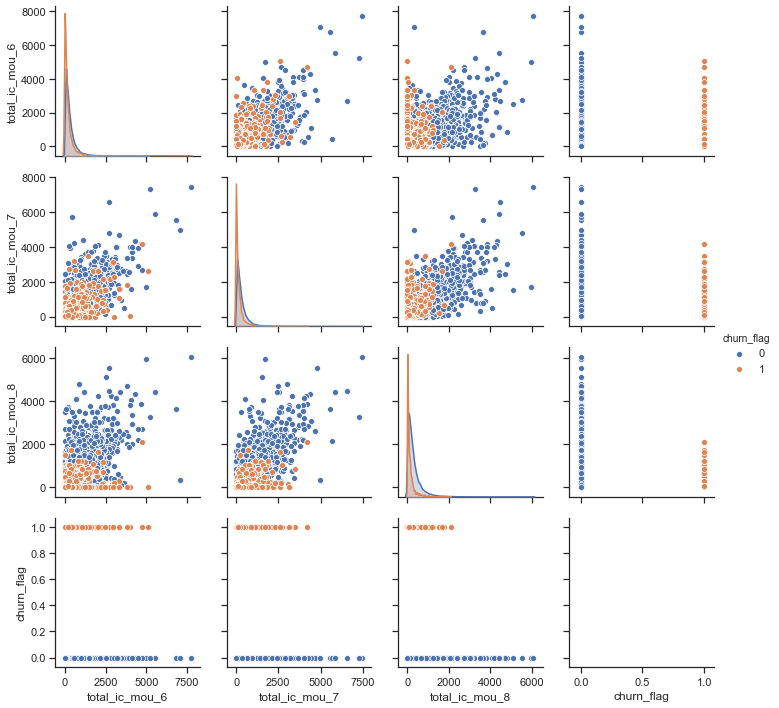

In [52]:
#Checking based on total_ic_mou (Total incoming calls received by a person)
sns.pairplot(data=tele_filtered[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','churn_flag']],hue='churn_flag')

For total incoming calls, the higher the number the more churns are observed. This may be due to spam calls, because of which the customer might not continue with the services.

## total_rech_num (Number of times a customer recharged his mobile)

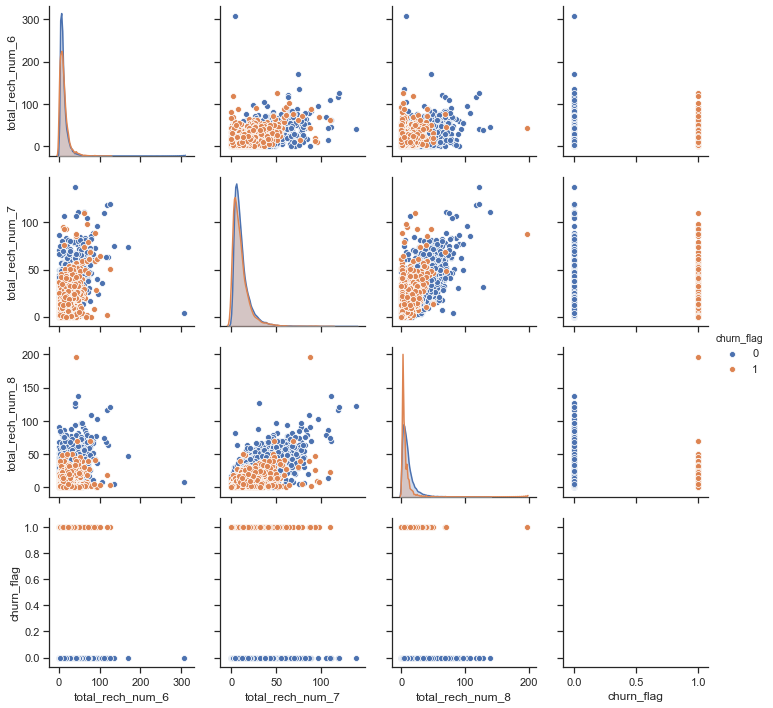

In [53]:
#Checking based on total_rech_num (Number of times a customer recharged his mobile)
sns.pairplot(data=tele_filtered[['total_rech_num_6','total_rech_num_7','total_rech_num_8','churn_flag']],hue='churn_flag')

We observe a gradual decrease in the number of times the customer has recharged from month 6 to month 8. This eventually also shows the probable chance of churns increasing as well.

## total_rech_amt (Total recharge amount in a particular month)

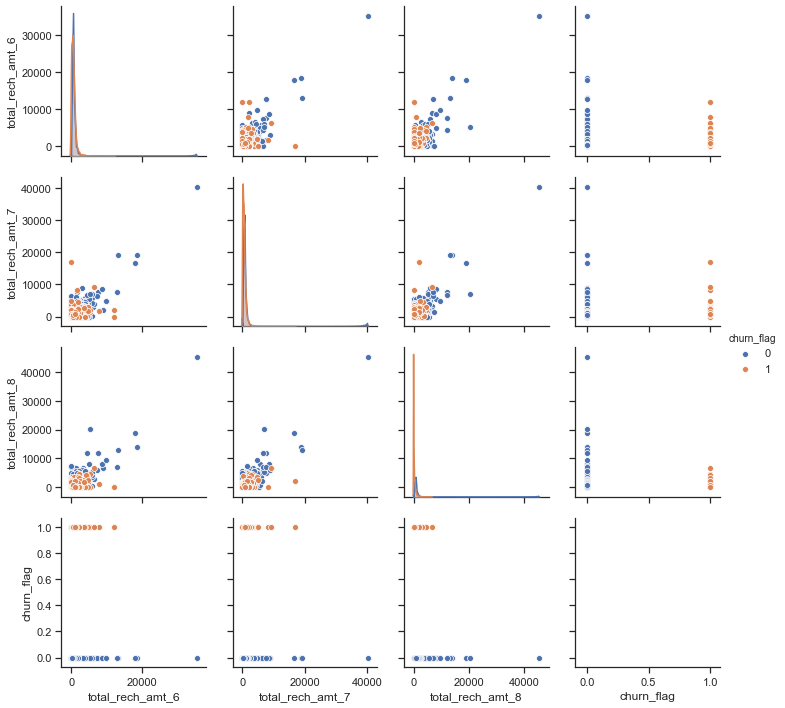

In [54]:
#Checking based on total_rech_amt (Total recharge amount in a particular month)
sns.pairplot(data=tele_filtered[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','churn_flag']],hue='churn_flag')

Text(0.5, 1.0, 'Churn')

Text(0.5, 1.0, 'Non-Churn')

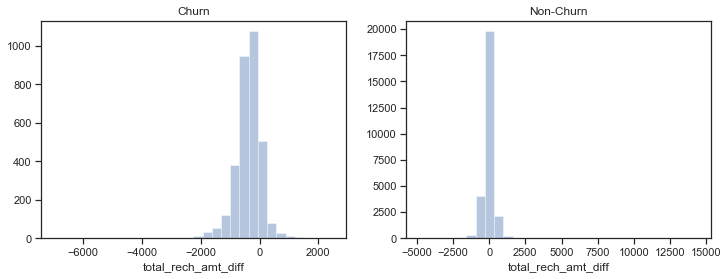

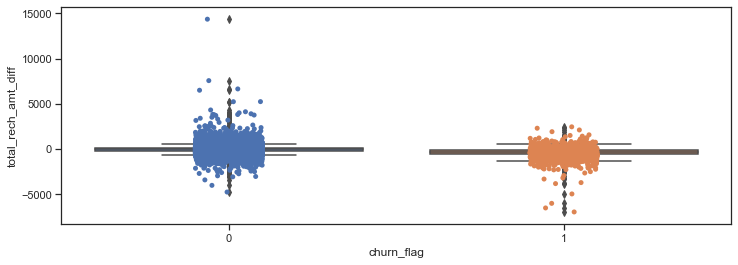

In [55]:
#Performing further on total_rech_amt_diff
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].total_rech_amt_diff, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].total_rech_amt_diff, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='total_rech_amt_diff', data=df)
sns.stripplot(x='churn_flag', y='total_rech_amt_diff', data=df, jitter=True, edgecolor="gray")

Total recharge amount in a particular month has reduced significantly over the months. We also observe a high steep in churns in month 8.

## total_rech_data (Total number of times mobile data has been recharged)

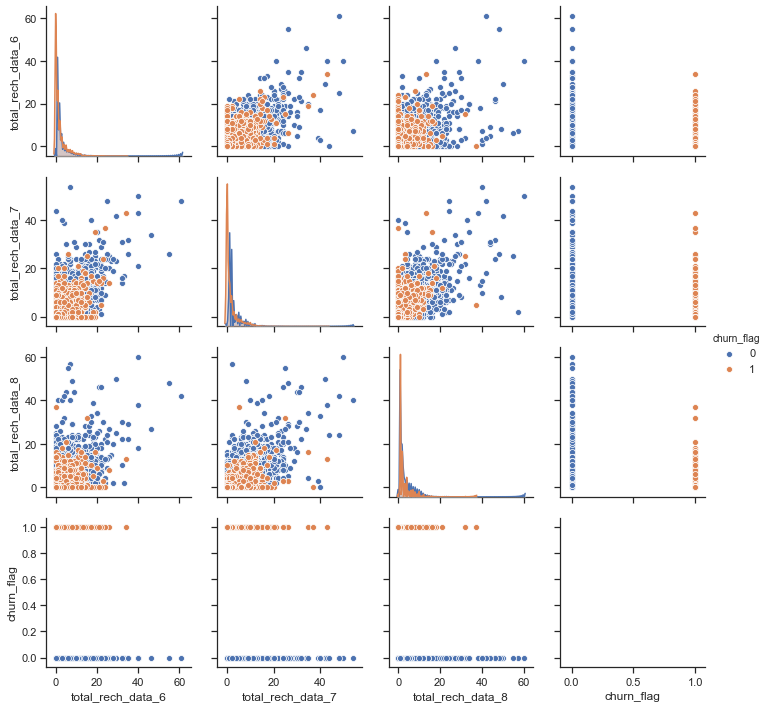

In [56]:
#Checking based on total_rech_data (Total number of times mobile data has been recharged)
sns.pairplot(data=tele_filtered[['total_rech_data_6','total_rech_data_7','total_rech_data_8','churn_flag']],hue='churn_flag')

Text(0.5, 1.0, 'Churn')

Text(0.5, 1.0, 'Non-Churn')

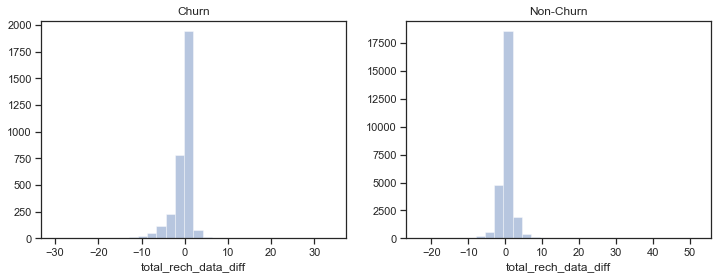

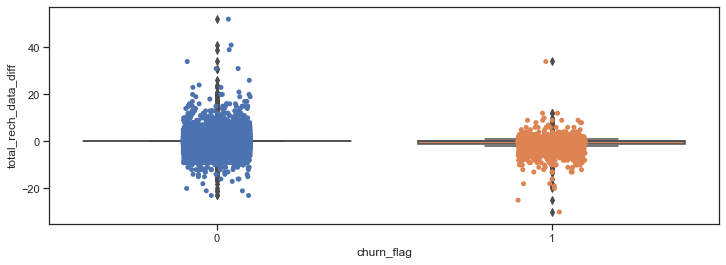

In [57]:
#Performing further on total_rech_data_diff
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].total_rech_data_diff, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].total_rech_data_diff, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='total_rech_data_diff', data=df)
sns.stripplot(x='churn_flag', y='total_rech_data_diff', data=df, jitter=True, edgecolor="gray")

If we observe the difference between month 8 and average of month 6 and 7, we can see that there is a decrease in the number of times a customer has recharged data packs in month 8. We also have a steep posibility of churn in this case.

## vol_2g_mb (Internet usage in MB in 2G)

Text(0.5, 1.0, 'Churn')

Text(0.5, 1.0, 'Non-Churn')

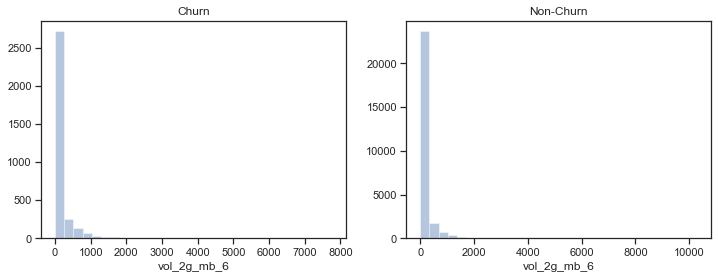

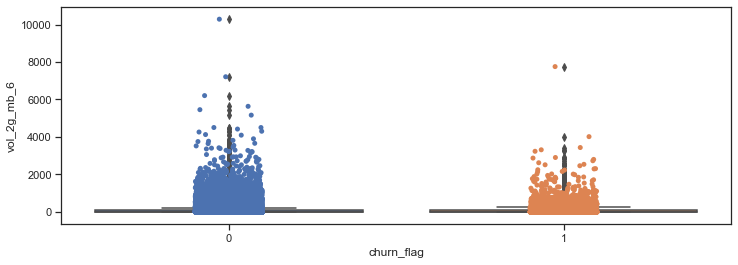

In [58]:
#Performing further EDA on vol_2g_mb (Internet usage in MB in 2G) for good month 6
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].vol_2g_mb_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].vol_2g_mb_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='vol_2g_mb_6', data=df)
sns.stripplot(x='churn_flag', y='vol_2g_mb_6', data=df, jitter=True, edgecolor="gray")

Text(0.5, 1.0, 'Churn')

Text(0.5, 1.0, 'Non-Churn')

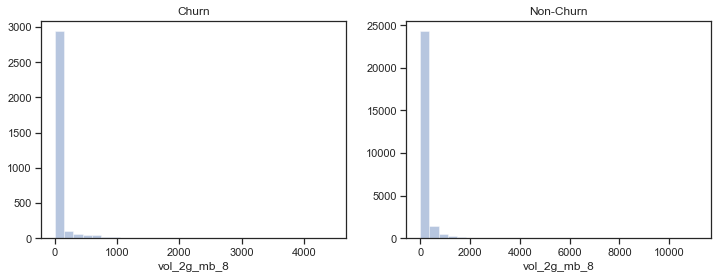

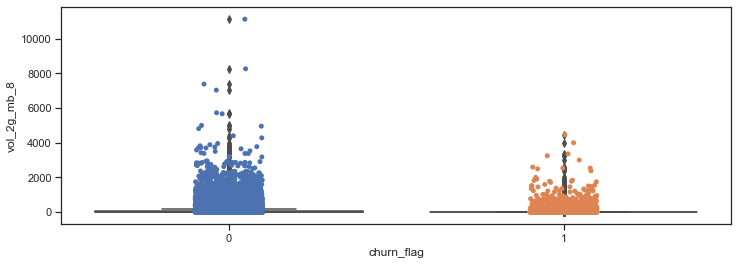

In [59]:
#Performing further EDA on vol_2g_mb (Internet usage in MB in 2G) for action month 8
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].vol_2g_mb_8, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].vol_2g_mb_8, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='vol_2g_mb_8', data=df)
sns.stripplot(x='churn_flag', y='vol_2g_mb_8', data=df, jitter=True, edgecolor="gray")

## vol_3g_mb (Internet usage in MB in 3G)

Text(0.5, 1.0, 'Churn')

Text(0.5, 1.0, 'Non-Churn')

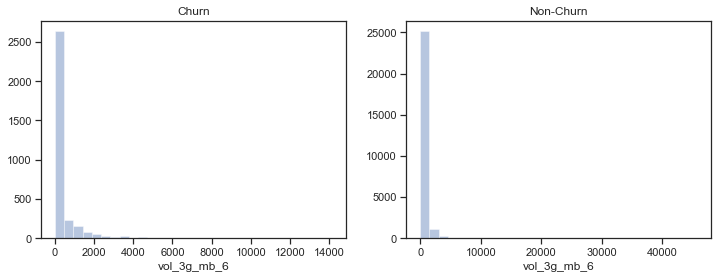

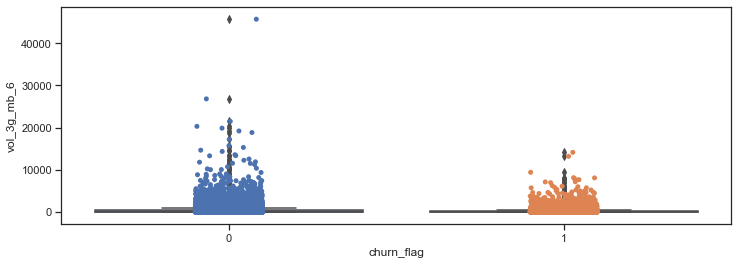

In [60]:
#Performing further EDA on vol_3g_mb (Internet usage in MB in 3G) for good month 6
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].vol_3g_mb_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].vol_3g_mb_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='vol_3g_mb_6', data=df)
sns.stripplot(x='churn_flag', y='vol_3g_mb_6', data=df, jitter=True, edgecolor="gray")

Text(0.5, 1.0, 'Churn')

Text(0.5, 1.0, 'Non-Churn')

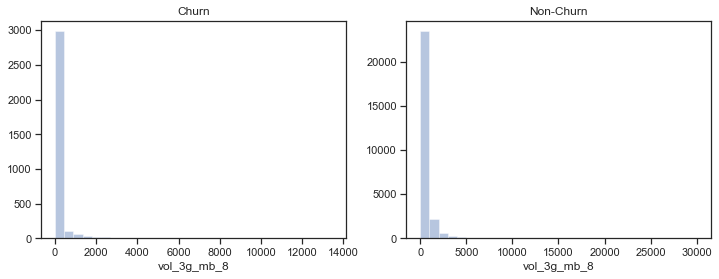

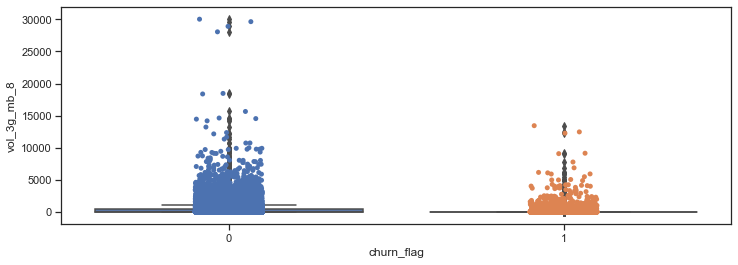

In [61]:
#Performing further EDA on vol_3g_mb (Internet usage in MB in 3G) for action month 8
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].vol_3g_mb_8, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].vol_3g_mb_8, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='vol_3g_mb_8', data=df)
sns.stripplot(x='churn_flag', y='vol_3g_mb_8', data=df, jitter=True, edgecolor="gray")

By observing both the 2G and 3G usage of internet, we see that with lower usage the possibility of churn increases.

## Building the Model

In [62]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import svm

In [63]:
X = df[df.columns[~df.columns.isin(['churn_flag'])]]
Y = df['churn_flag']

In [64]:
df.shape

(30001, 172)

#### Feature Scaling : We will be training different models on the dataset. Feature scaling will reduce any distortion due to high values and make algorithms easier to process

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [66]:
#Split the data into a training and a test part. 
#The models will be trained on the training data set and tested on the test data set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std,Y, train_size=0.7,test_size=0.3,random_state=111)
print("Training dataset size",X_train.shape)
print("Training dataset target size",y_train.shape)
print("Test dataset size",X_test.shape)
print("Test dataset target size",y_test.shape)

Training dataset size (21000, 171)
Training dataset target size (21000,)
Test dataset size (9001, 171)
Test dataset target size (9001,)


In [67]:
X_test

array([[ 0.        ,  0.        ,  0.        , ...,  0.08813493,
         0.29237273,  0.0715669 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.07384888,
         0.07747152,  0.00913484],
       [ 0.        ,  0.        ,  0.        , ...,  0.08813493,
         0.07747152,  0.00913484],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.35135863,
        -1.69253301,  0.00913484],
       [ 0.        ,  0.        ,  0.        , ...,  0.08813493,
        -4.50969253,  1.76043414],
       [ 0.        ,  0.        ,  0.        , ...,  0.24336942,
         0.07747152,  0.00913484]])

In [68]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Using TensorFlow backend.


Before OverSampling, counts of label '1': 2307
Before OverSampling, counts of label '0': 18693 

After OverSampling, the shape of train_X: (37386, 171)
After OverSampling, the shape of train_y: (37386,) 

After OverSampling, counts of label '1': 18693
After OverSampling, counts of label '0': 18693


In [69]:
X_train = X_train_res
y_train = y_train_res

### PCA : PCA on data will decrease the amount of operations during training and testing

In [70]:
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

In [71]:
#Extracting pca model from pipeline
pca = pca.named_steps['pca']

In [72]:
#Look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       10.15
1       18.80
2       24.18
3       29.07
4       32.97
5       36.40
6       39.16
7       41.84
8       44.27
9       46.36
10      48.44
11      50.36
12      52.25
13      54.05
14      55.76
15      57.43
16      59.01
17      60.51
18      61.94
19      63.31
20      64.64
21      65.87
22      67.09
23      68.31
24      69.47
25      70.60
26      71.64
27      72.63
28      73.62
29      74.58
30      75.48
31      76.37
32      77.22
33      78.06
34      78.88
35      79.67
36      80.46
37      81.20
38      81.90
39      82.60
40      83.28
41      83.90
42      84.51
43      85.13
44      85.73
45      86.28
46      86.83
47      87.33
48      87.83
49      88.32
50      88.78
51      89.23
52      89.67
53      90.09
54      90.45
55      90.81
56      91.16
57      91.50
58      91.83
59      92.15
60      92.46
61      92.75
62      93.04
63      93.33
64      93.61
65      93.88
66      94.15
67      94.39
68      94.63
69      94.86
70      95.08
71    

~ 53 components explain 90% variance while ~ 70 components explain 95% variance

### Model 1 : PCA and Logistic Regression

In [73]:
#Create pipeline
PCA_VARS = 56
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [74]:
#Fit model
pipeline.fit(X_train, y_train)

#Check score on train data
pipeline.score(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=56,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logistic',
                 LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

0.8199593430695983

In [75]:
# Evaluation
from imblearn.metrics import sensitivity_specificity_support
#Predict churn on test data
y_pred = pipeline.predict(X_test)

#Create the confusion matrix
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6410 1632]
 [ 174  785]]
Sensitivity: 	0.82
Specificity: 	0.8
AUC:    	 0.88


In [76]:
#Hyperparameter tuning - PCA and Logistic Regression

In [77]:
pd.value_counts(y_train)/y_train.shape

1    0.5
0    0.5
dtype: float64

In [78]:
#PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.5, 1: 0.5})

#Create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

#Compile pipeline
pca_logistic = Pipeline(steps)

#Hyperparameter space
params = {'pca__n_components': [53, 70], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

#Create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

#Create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [79]:
#Fitting the model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  6.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRe...
                                                           multi_class='warn',
       

In [80]:
#Cross validation results
cvr = pd.DataFrame(model.cv_results_)
cvr.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.722650,0.544558,0.048446,0.005352,0.1,l1,53,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.893831,0.897986,0.892306,0.893276,0.897735,0.895027,0.002366,32
1,3.176422,0.421531,0.057065,0.003645,0.1,l1,70,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.897331,0.900903,0.894091,0.895941,0.899688,0.897591,0.002466,6
2,3.253765,0.422032,0.057121,0.006078,0.1,l2,53,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.893789,0.897851,0.892408,0.893282,0.897916,0.895049,0.002356,29
3,4.432230,0.334559,0.063263,0.005087,0.1,l2,70,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.896746,0.901422,0.893702,0.896119,0.899934,0.897585,0.002763,7
4,3.451422,1.277475,0.059362,0.007500,0.5,l1,53,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",0.894076,0.897938,0.892369,0.893330,0.897861,0.895115,0.002337,25


In [81]:
#Best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8977515652776437
Best hyperparameters:  {'logistic__C': 3, 'logistic__penalty': 'l1', 'pca__n_components': 70}


In [82]:
#Evaluation
#Predict churn on test data
y_pred = model.predict(X_test)

#Create confusion matrix
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6411 1631]
 [ 167  792]]
Sensitivity: 	0.83
Specificity: 	0.8
ROC:    	 0.88


### Model 2 : Random Forest

In [83]:
##### Random forest - the class weight is used to handle class imbalance
forest = RandomForestClassifier(class_weight={0:0.5, 1: 0.5}, n_jobs = -1)

#Hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

#Create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

#Create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [84]:
#Fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight={0: 0.5, 1: 0.5},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                

In [85]:
#Print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9805896885728014
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 'auto'}


In [86]:
#Evaluation
#Predict churn on test data
y_pred = model.predict(X_test)

#Create onfusion matrix
cm3 = confusion_matrix(y_test, y_pred)
print(cm3)


# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[7534  508]
 [ 359  600]]
Sensitivity: 	0.63
Specificity: 	0.94
ROC:    	 0.9


### Model 3 : Support Vector Machine

In [87]:
#SVM
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [88]:
#Evaluation
#Predict churn on test data
y_pred = svm_linear.predict(X_test)

#Create onfusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print(cm4)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6520 1522]
 [ 177  782]]
Sensitivity: 	0.82
Specificity: 	0.81
ROC:    	 0.9


Looking at the figures above we can say that PCA with Logistic regression and SVM are both good models. However we can consider PCA with Logistic regression as the best model among the 3, since it takes less execution time and has better interpretability. We can also state that there is no overfitting in the PCA with Logistic regression model since, after Hyperparameter tuning also also there is no overfitting.

##### Now we will run a model (without PCA) where we will identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

### Feature Importance

### Model 4 : Model without PCA

In [90]:
X = tele_filtered.drop(['churn_flag'],axis=1)
# Putting response variable to y
y = tele_filtered['churn_flag']

y.head()
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

0    1
1    1
2    0
3    0
4    0
Name: churn_flag, dtype: int64

In [91]:
X_train.shape

(21000, 171)

In [92]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [93]:
## from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg,15)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False False False False False False False False False False False False
 False False False False False False  True  True False  True  True False
  True  True False False False False  True  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False  True False False  True False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True  True
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [94]:
col = X_train.columns[~rfe.support_]
X_train2 = X_train.drop(col,1)
X_test2 = X_test.drop(col,1)
X_train2.shape
X_test2.shape

(21000, 15)

(9001, 15)

In [95]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             churn_flag   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20984
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6325.1
Date:                Sun, 12 Apr 2020   Deviance:                       12650.
Time:                        15:28:10   Pearson chi2:                 3.23e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.0058      0.043    -23.597      0.000      -1.089      -0.922
loc_og_t2t_mou_6     0.2922      0.042      6.903      0.000       0.209       0.375
loc_og_t2t_mou_7     0.4769      0.043     10.992      0.000       0.392       0.562
loc_og_t2m_mou_6     0.2929      0.042      6.918      0.000       0.210       0.376
loc_og_t2m_mou_7     0.4752      0.043     10.949      0.000       0.390       0.560
loc_og_t2f_mou_6     0.2939      0.043      6.913      0.000       0.211       0.377
loc_og_t2f_mou_7     0.4750      0.044     10.896      0.000       0.390       0.560
loc_og_mou_6        -0.2919      0.042     -6.896      0.000      -0.375      -0.209
loc_og_mou_7        -0.4781      0.043    -11.022      0.000      -0.563      -0.393
loc_ic_t2t_mou_7     0.4186      0.041     10.231      0.000       0.338       0.499
loc_ic_t2m_mou_7     0.4182      0.041     10.220      0.000       0.338       0.498
loc_ic_t2f_mou_7     0.4177      0.041     10.193      0.000       0.337       0.498
loc_ic_mou_7        -0.4192      0.041    -10.248      0.000      -0.499      -0.339
monthly_2g_7        -0.1435      0.074     -1.939      0.052      -0.289       0.002
monthly_2g_8        -0.3292      0.105     -3.140      0.002      -0.535      -0.124
fb_user_8           -0.5442      0.028    -19.771      0.000      -0.598      -0.490
====================================================================================
"""

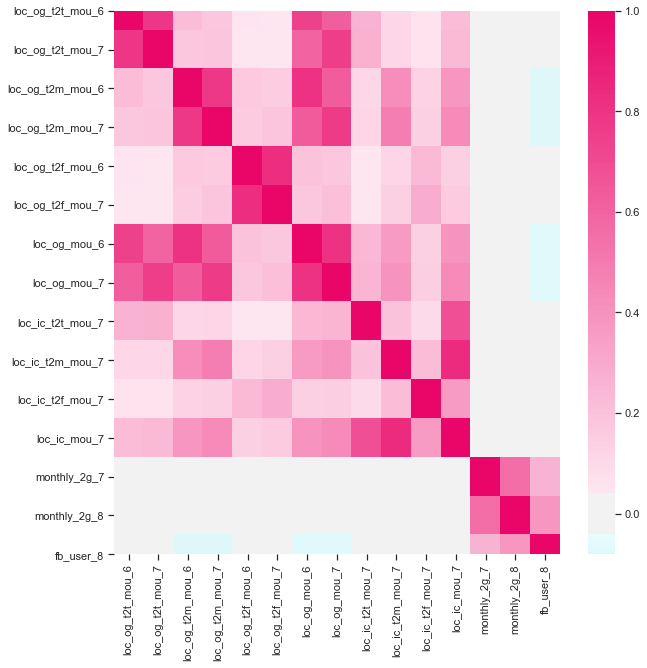

In [96]:
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train2.corr(), center=0.0, cmap=mycmap)

In [97]:
col = ['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_mou_6']
X_train3 = X_train2.drop(col,1)
X_test3 = X_test2.drop(col,1)
X_train3.shape
X_test3.shape

(21000, 11)

(9001, 11)

In [98]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train3)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             churn_flag   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20988
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6366.4
Date:                Sun, 12 Apr 2020   Deviance:                       12733.
Time:                        15:28:11   Pearson chi2:                 2.98e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.0868      0.040    -27.022      0.000      -1.166      -1.008
loc_og_t2t_mou_7     0.5147      0.043     11.964      0.000       0.430       0.599
loc_og_t2m_mou_7     0.5135      0.043     11.930      0.000       0.429       0.598
loc_og_t2f_mou_7     0.5136      0.043     11.881      0.000       0.429       0.598
loc_og_mou_7        -0.5156      0.043    -11.987      0.000      -0.600      -0.431
loc_ic_t2t_mou_7     0.4415      0.041     10.841      0.000       0.362       0.521
loc_ic_t2m_mou_7     0.4412      0.041     10.831      0.000       0.361       0.521
loc_ic_t2f_mou_7     0.4404      0.041     10.797      0.000       0.360       0.520
loc_ic_mou_7        -0.4421      0.041    -10.859      0.000      -0.522      -0.362
monthly_2g_7        -0.1545      0.074     -2.092      0.036      -0.299      -0.010
monthly_2g_8        -0.3364      0.105     -3.213      0.001      -0.542      -0.131
fb_user_8           -0.5392      0.027    -19.683      0.000      -0.593      -0.486
====================================================================================
"""

In [168]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9, class_weight='balanced')
#logsk.fit(X_train[col], y_train)
logsk.fit(X_train3, y_train)

LogisticRegression(C=1000000000.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [169]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test3)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.711439
1,0.446759
2,0.247194
3,0.407309
4,0.601714


In [170]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn_flag
6102,1
2539,1
21576,0
19574,0
12804,1


In [171]:
# Putting CustID to index
y_test_df['cust_id'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['cust_ID','churn_flag','Churn_Prob'], axis=1,method ='ffill')
# Let's see the head of y_pred_final
y_pred_final.head()

,churn_flag,cust_id,Churn_Prob
0,1,6102,0.711439
1,1,2539,0.446759
2,0,21576,0.247194
3,0,19574,0.407309
4,1,12804,0.601714


In [172]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,churn_flag,cust_id,Churn_Prob,predicted
0,1,6102,0.711439,1
1,1,2539,0.446759,0
2,0,21576,0.247194,0
3,0,19574,0.407309,0
4,1,12804,0.601714,1


In [173]:
#Model Evaluation

In [174]:
from sklearn import metrics

In [175]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn_flag, y_pred_final.predicted )
confusion

array([[5248, 2769],
       [ 244,  740]])

In [176]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn_flag, y_pred_final.predicted)

0.6652594156204866

In [177]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

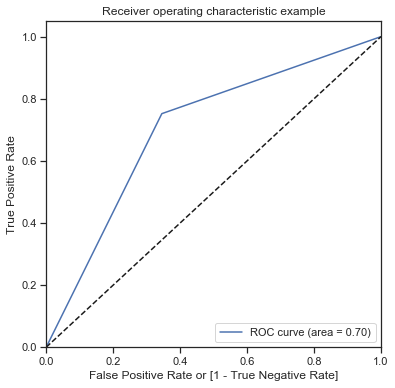

(array([0.        , 0.34539104, 1.        ]),
 array([0.        , 0.75203252, 1.        ]),
 array([2, 1, 0]))

In [179]:
draw_roc(y_pred_final.churn_flag, y_pred_final.predicted)

In [181]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.churn_flag, y_pred_final.Churn_Prob))

'0.77'

##### AUC is coming as 0.77

## Business Insights

- The Telecom company needs to pay attention in providing good offers to customers in roaming zone.
- It should also focus in providing proper talktime rates not only for outgoing calls to same operator, but for outgoing calls to other operators as well.
- The company also needs to bring the attention towards STD and ISD call rates. Perhaps work towards providing proper packages.
- Apart from STD and ISD rates, it is also very important to provide value adding offers on data packs (both 2G and 3G).
- The above can be addresed through collection of surveys or customer queries / complaints and work about the services based on the requirements of the customers.